# ***Análisis Exploratorio de Datos - House Prices Advanced Regression***

## Objetivo del análisis

Este análisis explora el dataset de precios de viviendas para comprender las variables, relaciones y patrones que influyen en el precio de las casas.

## Descripción del dataset

El dataset contiene información sobre ventas de viviendas en Ames, Iowa, con 80 variables explicativas que incluyen características de las propiedades, ubicación, calidad, y más.

___

In [1]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline


# Cargar los datos

train_df = pd.read_csv('/home/mz8k/house-prices-ml-pipeline/data/raw/train.csv')
test_df = pd.read_csv('/home/mz8k/house-prices-ml-pipeline/data/raw/test.csv')

## 1. Vista inicial del dataset

In [2]:
# Dimensiones del dataset
print("Dimensiones del dataset de entrenamiento:")
print(f"Filas: {train_df.shape[0]}, Columnas: {train_df.shape[1]}\n")

print("Dimensiones del dataset de prueba:")
print(f"Filas: {test_df.shape[0]}, Columnas: {test_df.shape[1]}\n")

# Información básica
print("Información del dataset de entrenamiento:")
train_df.info()

# %%
# Primeras filas del dataset
print("Primeras 5 filas del dataset:")
train_df.head()

Dimensiones del dataset de entrenamiento:
Filas: 1460, Columnas: 81

Dimensiones del dataset de prueba:
Filas: 1459, Columnas: 80

Información del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Análisis de la variable objetivo (SalePrice)

Estadísticas descriptivas de SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


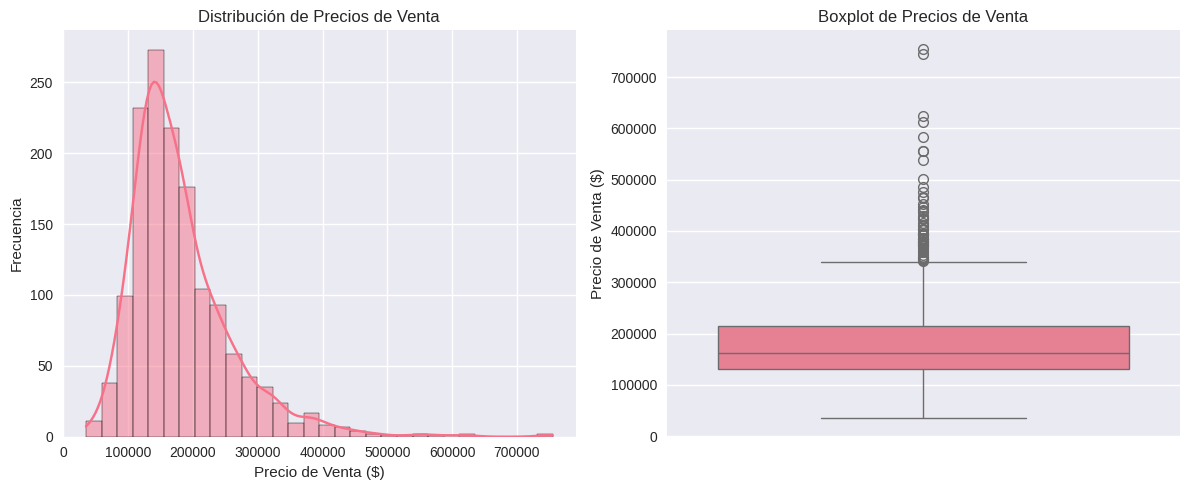

In [3]:
# Estadísticas descriptivas de la variable objetivo

print("Estadísticas descriptivas de SalePrice:")
print(train_df['SalePrice'].describe())

# Visualización de la distribución de SalePrice

plt.figure(figsize=(12, 5))

# Subplot 1: Histograma

plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, bins=30)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta ($)')
plt.ylabel('Frecuencia')

# Subplot 2: Boxplot

plt.subplot(1, 2, 2)
sns.boxplot(y=train_df['SalePrice'])
plt.title('Boxplot de Precios de Venta')
plt.ylabel('Precio de Venta ($)')

plt.tight_layout()
plt.show()

# Análisis de la variable SalePrice:

## - **Rango de precios**: Los precios van desde aproximadamente $34,900 hasta $755,000

## - **Precio promedio**: El precio medio es de $180,921

## - **Distribución**: La distribución está sesgada a la derecha (positivamente), lo que es común en datos de precios de viviendas

## - **Valores atípicos**: Existen algunas propiedades con precios significativamente más altos que el resto

___

In [4]:
# Análisis de normalidad de SalePrice

print("Prueba de normalidad para SalePrice:")
stat, p_value = stats.shapiro(train_df['SalePrice'])
print(f"Estadístico: {stat:.4f}, p-valor: {p_value:.4e}")

if p_value > 0.05:
    print("La distribución es normal (p > 0.05)")
else:
    print("La distribución NO es normal (p < 0.05)")

Prueba de normalidad para SalePrice:
Estadístico: 0.8697, p-valor: 3.2061e-33
La distribución NO es normal (p < 0.05)


## 3. Valores faltantes

Columnas con valores faltantes:
              Valores_Faltantes  Porcentaje
PoolQC                     1453   99.520548
MiscFeature                1406   96.301370
Alley                      1369   93.767123
Fence                      1179   80.753425
MasVnrType                  872   59.726027
FireplaceQu                 690   47.260274
LotFrontage                 259   17.739726
GarageType                   81    5.547945
GarageYrBlt                  81    5.547945
GarageFinish                 81    5.547945
GarageQual                   81    5.547945
GarageCond                   81    5.547945
BsmtFinType2                 38    2.602740
BsmtExposure                 38    2.602740
BsmtFinType1                 37    2.534247
BsmtCond                     37    2.534247
BsmtQual                     37    2.534247
MasVnrArea                    8    0.547945
Electrical                    1    0.068493


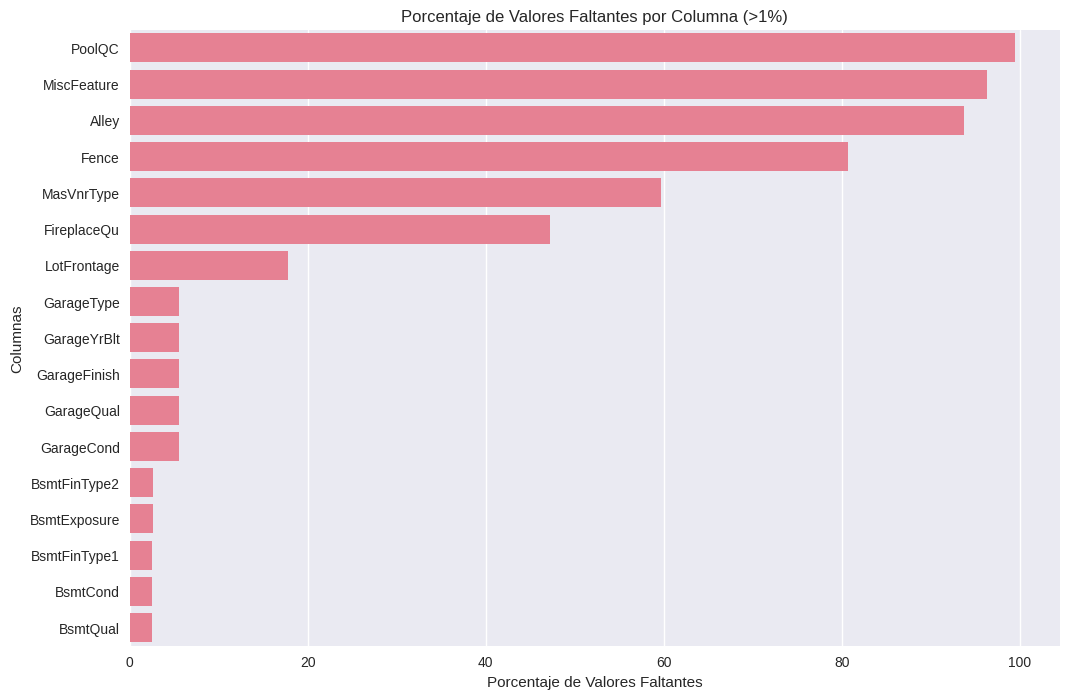

In [5]:
# Análisis de valores faltantes

missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100

# Crear DataFrame con valores faltantes

missing_df = pd.DataFrame({
    'Valores_Faltantes': missing_values,
    'Porcentaje': missing_percentage
})

# Filtrar columnas con valores faltantes

missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values('Porcentaje', ascending=False)

print("Columnas con valores faltantes:")
print(missing_df)


# Visualización de valores faltantes

plt.figure(figsize=(12, 8))
missing_df = missing_df[missing_df['Porcentaje'] > 1]  # Mostrar solo columnas con >1% de valores faltantes

sns.barplot(x=missing_df['Porcentaje'], y=missing_df.index)
plt.title('Porcentaje de Valores Faltantes por Columna (>1%)')
plt.xlabel('Porcentaje de Valores Faltantes')
plt.ylabel('Columnas')
plt.show()

# Análisis de valores faltantes:

### - **PoolQC**: 99.5% de valores faltantes - probablemente porque la mayoría de las casas no tienen piscina

### - **MiscFeature, Alley, Fence**: Alto porcentaje de valores faltantes - pueden representar características ausentes

### - **FireplaceQu**: 47% de valores faltantes - probablemente casas sin chimenea

### - **Otras variables**: Bajos porcentajes de valores faltantes que pueden ser imputados

In [6]:
# Análisis de tipos de datos

numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=[object]).columns.tolist()

print(f"Variables numéricas: {len(numeric_cols)}")
print(f"Variables categóricas: {len(categorical_cols)}")

Variables numéricas: 38
Variables categóricas: 43


## 4. Correlaciones con la variable objetivo

Variables con mayor correlación con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Variables con menor correlación con SalePrice:
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


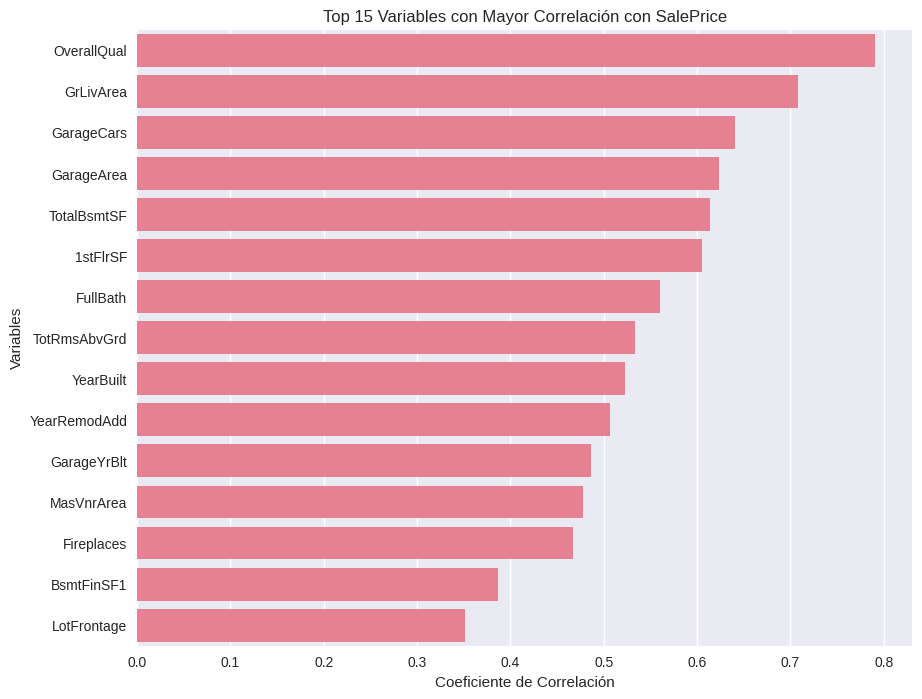

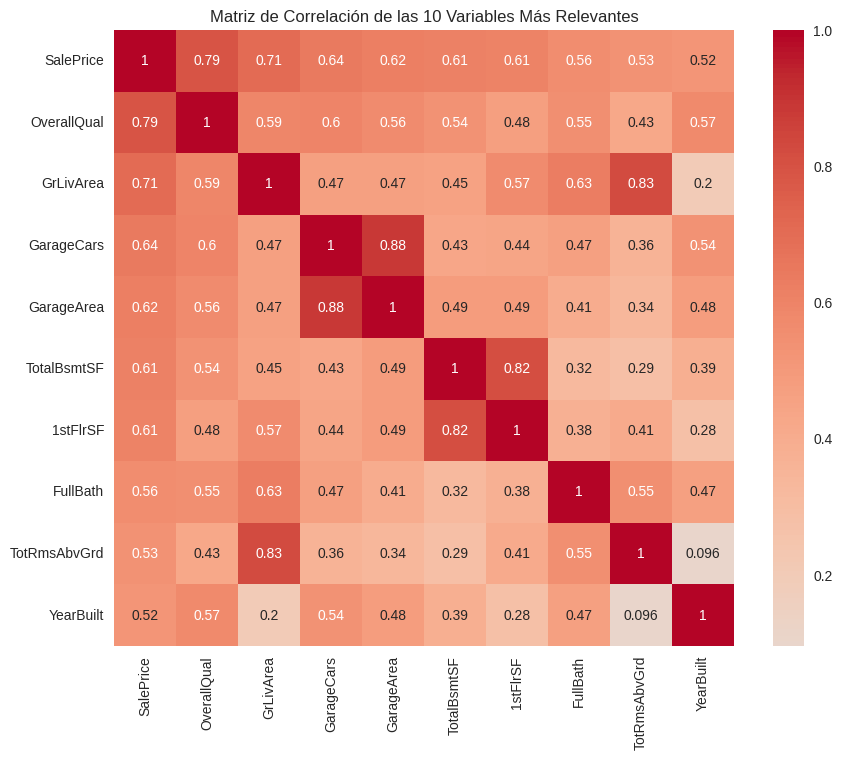

In [7]:
# Matriz de correlación con SalePrice

correlation_with_target = train_df[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)

print("Variables con mayor correlación con SalePrice:")
print(correlation_with_target.head(10))

print("\nVariables con menor correlación con SalePrice:")
print(correlation_with_target.tail(10))


# Visualización de las 15 variables más correlacionadas

plt.figure(figsize=(10, 8))
top_corr_features = correlation_with_target.index[1:16]  # Excluir SalePrice itself
top_corr_values = correlation_with_target.values[1:16]

sns.barplot(x=top_corr_values, y=top_corr_features)
plt.title('Top 15 Variables con Mayor Correlación con SalePrice')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.show()


# Matriz de correlación de las 10 variables más correlacionadas

top_features = correlation_with_target.index[:10]
correlation_matrix = train_df[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de las 10 Variables Más Relevantes')
plt.show()

## Análisis de correlaciones:
### - **OverallQual**: La calidad general tiene la correlación más fuerte (0.79) con el precio

### - **GrLivArea**: El área habitable above grade muestra alta correlación (0.71)

### - **GarageCars** y **GarageArea**: Variables de garaje están fuertemente correlacionadas con el precio

### - **TotalBsmtSF**: El área total del sótano también es importante

### - **Alta correlación entre variables**: Algunas variables como GarageCars y GarageArea están altamente correlacionadas entre sí, lo que podría indicar multicolinealidad

___

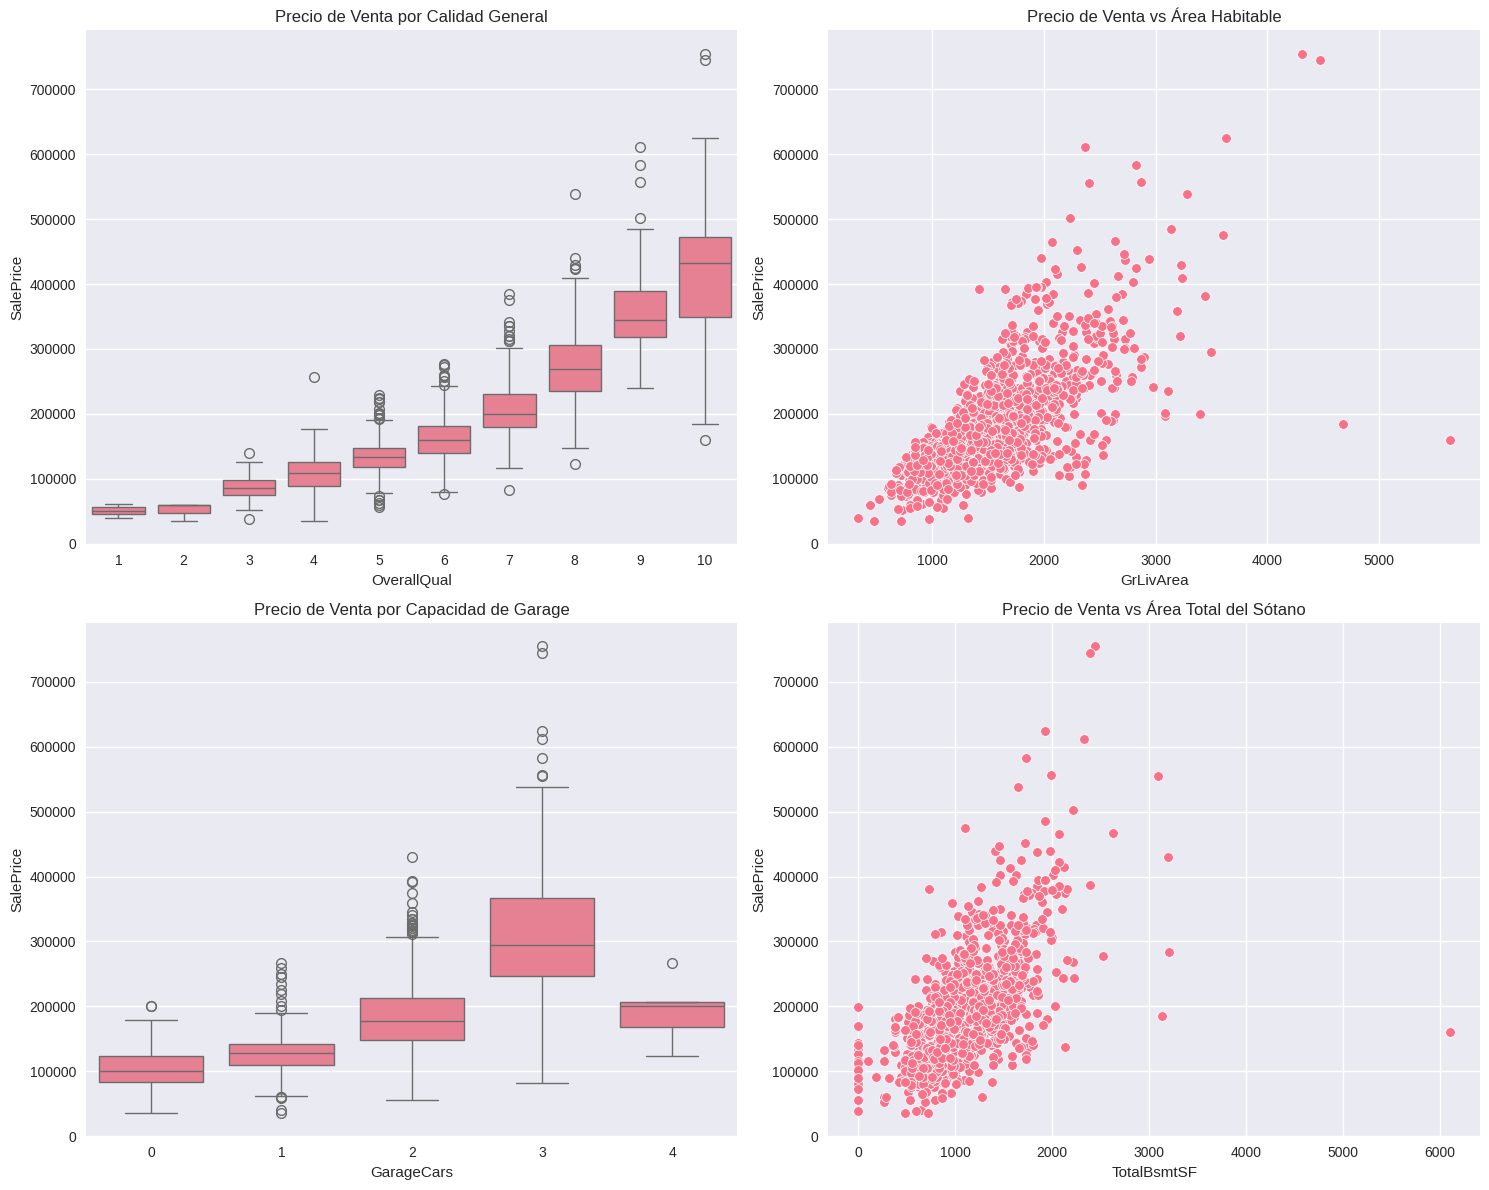

In [8]:
# Análisis de relaciones clave

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# OverallQual vs SalePrice

sns.boxplot(x='OverallQual', y='SalePrice', data=train_df, ax=axes[0, 0])
axes[0, 0].set_title('Precio de Venta por Calidad General')

# GrLivArea vs SalePrice

sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df, ax=axes[0, 1])
axes[0, 1].set_title('Precio de Venta vs Área Habitable')

# GarageCars vs SalePrice

sns.boxplot(x='GarageCars', y='SalePrice', data=train_df, ax=axes[1, 0])
axes[1, 0].set_title('Precio de Venta por Capacidad de Garage')

# TotalBsmtSF vs SalePrice

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df, ax=axes[1, 1])
axes[1, 1].set_title('Precio de Venta vs Área Total del Sótano')

plt.tight_layout()
plt.show()

___

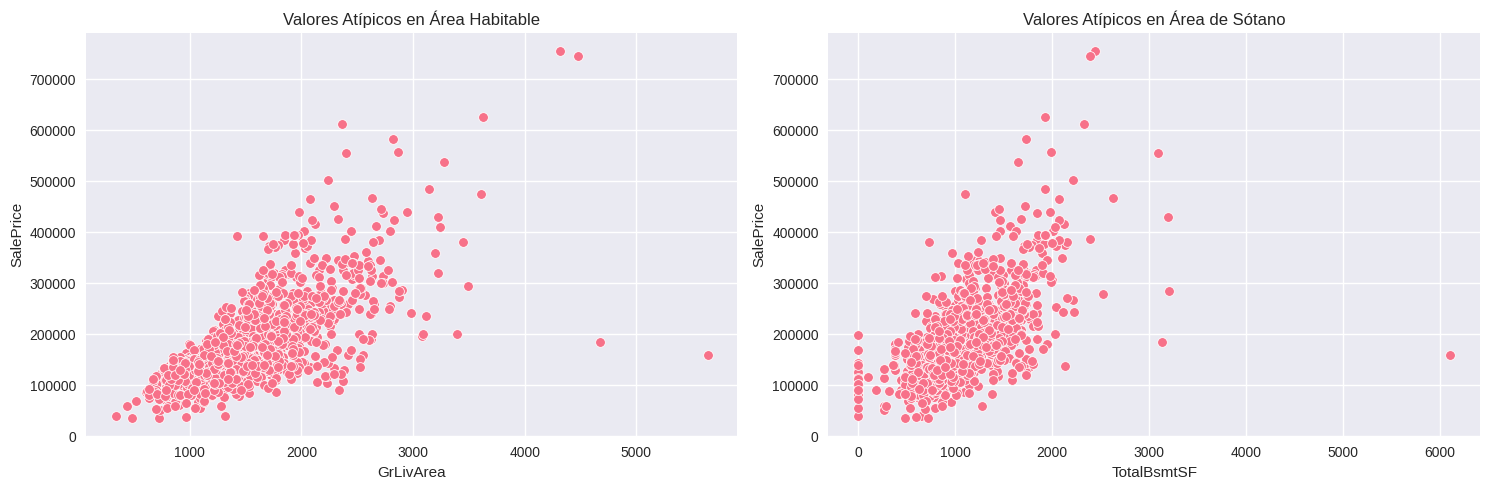

Casas con área habitable > 4000 pero precio < 300,000:
      GrLivArea  SalePrice
523        4676     184750
1298       5642     160000


In [9]:
## 5. Análisis de valores atípicos

# Identificación de valores atípicos en relaciones clave

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# GrLivArea - valores atípicos

sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df, ax=axes[0])
axes[0].set_title('Valores Atípicos en Área Habitable')

# TotalBsmtSF - valores atípicos

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df, ax=axes[1])
axes[1].set_title('Valores Atípicos en Área de Sótano')

plt.tight_layout()
plt.show()

# Identificar observaciones potencialmente problemáticas
# Casas con área habitable grande pero precio bajo

outliers_grlivarea = train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)]
print("Casas con área habitable > 4000 pero precio < 300,000:")
print(outliers_grlivarea[['GrLivArea', 'SalePrice']])

## Análisis de valores atípicos:

### - Se identificaron algunas propiedades con área habitable muy grande pero precios relativamente bajos

### - Estos valores atípicos podrían ser errores de datos o propiedades especiales que requieren investigación

### - Se recomienda considerar eliminar o transformar estos valores atípicos para mejorar el modelo


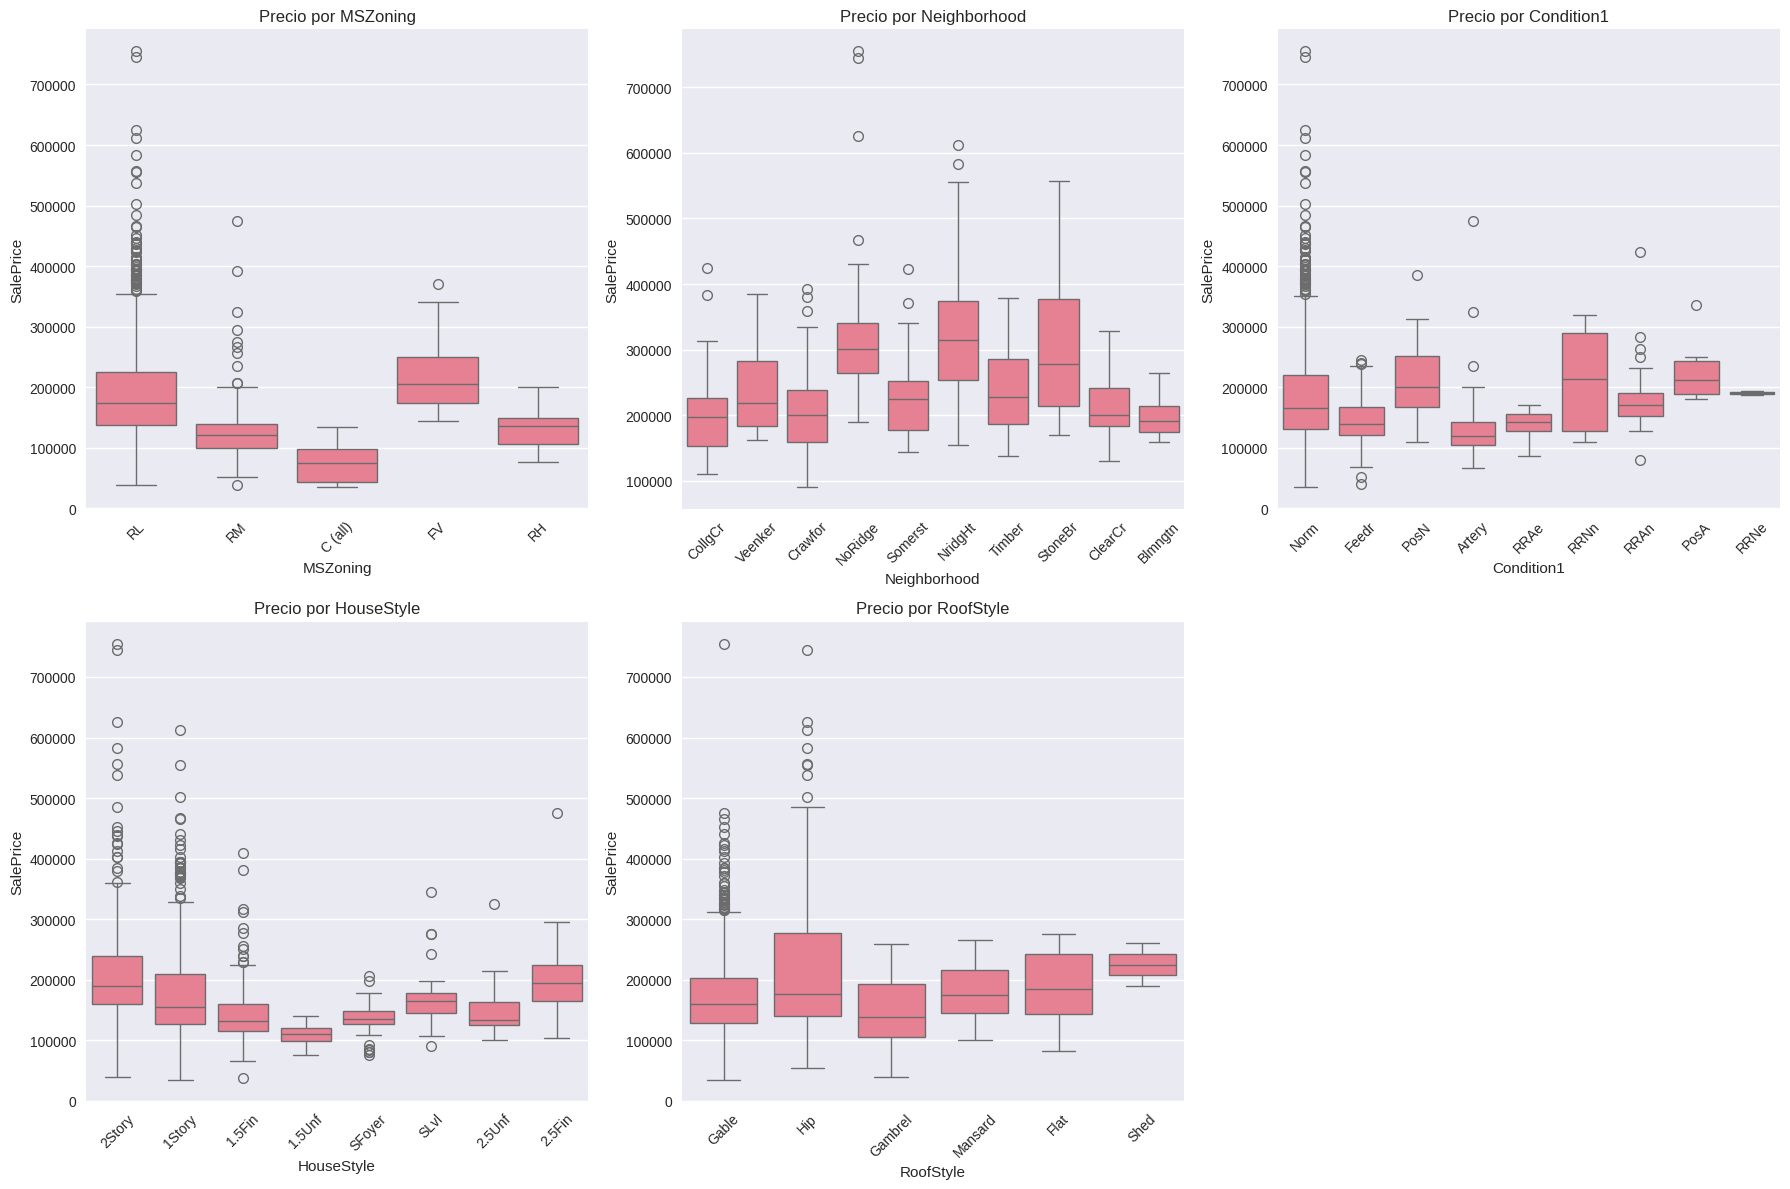

In [10]:
#Análisis de variables categóricas importantes
categorical_important = ['MSZoning', 'Neighborhood', 'Condition1', 'HouseStyle', 'RoofStyle']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, cat_var in enumerate(categorical_important):
    if i < len(axes):
        # Calcular medianas por categoría
        medians = train_df.groupby(cat_var)['SalePrice'].median().sort_values(ascending=False)
        
        # Tomar las top 10 categorías si hay muchas
        if len(medians) > 10:
            top_categories = medians.head(10).index
            temp_df = train_df[train_df[cat_var].isin(top_categories)]
        else:
            temp_df = train_df
        
        sns.boxplot(x=cat_var, y='SalePrice', data=temp_df, ax=axes[i])
        axes[i].set_title(f'Precio por {cat_var}')
        axes[i].tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

___

## 6. Resumen del Análisis Exploratorio

In [11]:
# Resumen estadístico final

print("=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===\n")
print(f"1. Tamaño del dataset: {train_df.shape[0]} observaciones, {train_df.shape[1]} variables")
print(f"2. Variable objetivo (SalePrice):")
print(f"   - Rango: ${train_df['SalePrice'].min():,} to ${train_df['SalePrice'].max():,}")
print(f"   - Media: ${train_df['SalePrice'].mean():,.2f}")
print(f"   - Mediana: ${train_df['SalePrice'].median():,.2f}")
print(f"3. Valores faltantes: {missing_df.shape[0]} columnas tienen valores faltantes")
print(f"4. Variables numéricas: {len(numeric_cols)}")
print(f"5. Variables categóricas: {len(categorical_cols)}")
print(f"6. Correlación más fuerte: OverallQual ({correlation_with_target['OverallQual']:.3f})")
print(f"7. Valores atípicos identificados: {len(outliers_grlivarea)} casos potencialmente problemáticos")

=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===

1. Tamaño del dataset: 1460 observaciones, 81 variables
2. Variable objetivo (SalePrice):
   - Rango: $34,900 to $755,000
   - Media: $180,921.20
   - Mediana: $163,000.00
3. Valores faltantes: 17 columnas tienen valores faltantes
4. Variables numéricas: 38
5. Variables categóricas: 43
6. Correlación más fuerte: OverallQual (0.791)
7. Valores atípicos identificados: 2 casos potencialmente problemáticos


___

# Conclusiones y Recomendaciones para el Modelado

## Hallazgos principales:
### 1. **Variable objetivo**: SalePrice tiene distribución sesgada, se recomienda transformación logarítmica
### 2. **Variables importantes**: OverallQual, GrLivArea, GarageCars, TotalBsmtSF son predictores fuertes
### 3. **Valores faltantes**: Algunas variables tienen muchos valores faltantes que representan características ausentes
### 4. **Correlaciones**: Existe multicolinealidad entre algunas variables (ej: GarageCars y GarageArea)
### 5. **Valores atípicos**: Algunas observaciones requieren tratamiento especial
 
#  Próximos pasos para el modelado:
### 1. Transformar la variable objetivo para normalizar su distribución
### 2. Desarrollar estrategia para manejar valores faltantes
### 3. Tratar valores atípicos identificados
### 4. Realizar encoding de variables categóricas
### 5. Considerar reducir dimensionalidad para variables altamente correlacionadas
### 6. Dividir datos en conjuntos de entrenamiento y validación
### 7. Probar diferentes algoritmos de machine learning

___

___